In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [41]:
sales = pd.read_csv("Adidas US Sales Data.csv") # import dataframe
sales.columns = sales.columns.str.replace(" ", "") # delete spaces

In [42]:
sales # display for testing

,Retailer,RetailerID,InvoiceDate,Region,State,City,Product,PriceperUnit,UnitsSold,TotalSales,OperatingProfit,OperatingMargin,SalesMethod
0,Foot Locker,1185732,1/1/2020,Northeast,Pennsylvania,Philadelphia,Women's Apparel,$53.00,83,"$4,399","$1,408",32%,Outlet
1,Foot Locker,1185732,1/1/2020,Northeast,Pennsylvania,Philadelphia,Women's Apparel,$68.00,83,"$5,644","$2,427",43%,Online
2,Foot Locker,1185732,1/1/2020,Northeast,New York,New York,Men's Street Footwear,$34.00,384,"$13,056","$6,789",52%,Outlet
3,Foot Locker,1185732,1/1/2020,Northeast,New York,New York,Men's Street Footwear,$47.00,336,"$15,792","$9,633",61%,Online
4,Foot Locker,1185732,1/1/2020,Northeast,Pennsylvania,Philadelphia,Women's Apparel,$75.00,275,"$206,250","$61,875",30%,Outlet
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9643,Foot Locker,1185732,12/31/2021,Northeast,Pennsylvania,Philadelphia,Men's Apparel,$46.00,56,"$2,576","$1,005",39%,Outlet
9644,Foot Locker,1185732,12/31/2021,Northeast,Pennsylvania,Philadelphia,Men's Apparel,$63.00,47,"$2,961","$1,362",46%,Online
9645,Amazon,1185732,12/31/2021,Northeast,Maine,Portland,Men's Apparel,$55.00,125,"$68,750","$17,188",25%,Outlet
9646,Foot Locker,1185732,12/31/2021,Northeast,Pennsylvania,Philadelphia,Men's Apparel,$70.00,175,"$122,500","$42,875",35%,Outlet


In [ ]:
sales.info() # collect info on datatypes and null values

In [ ]:
# View null rows
null_rows = sales[sales.isna().any(axis=1)]
null_rows

In [ ]:
sales.nunique() # get unique value information

In [43]:
# Turn each of the objects into floats so they can be worked with
floatConvert = ["PriceperUnit", "UnitsSold", "TotalSales", "OperatingProfit"]
for col in floatConvert:
    sales[col] = sales[col].astype(str).str.strip().str.replace("$", "", regex=False)
    sales[col] = sales[col].astype(str).str.strip().str.replace(",", "", regex=False)
    sales[col] = pd.to_numeric(sales[col], errors="coerce")

In [44]:
# Turn Operating Margin to percent so it can be worked with
sales["OperatingMargin"] = sales["OperatingMargin"].str.strip("%").astype("float") / 100

In [45]:
sales["PriceperUnit"] = sales["PriceperUnit"].fillna(sales["TotalSales"] / sales["UnitsSold"])
sales["UnitsSold"] = sales["UnitsSold"].fillna(sales["TotalSales"] / sales["PriceperUnit"])
sales["TotalSales"] = sales["TotalSales"].fillna(sales["PriceperUnit"] * sales["UnitsSold"])
sales["OperatingProfit"] = sales["OperatingProfit"].fillna(sales["TotalSales"] * sales["OperatingMargin"]).round(decimals = 0)

In [46]:
# Switched Invoice Date to datetime
sales['InvoiceDate'] = pd.to_datetime(sales['InvoiceDate'], errors='coerce')


In [47]:
# Drop RetailerId Column
sales = sales.drop(columns=['RetailerID'])

In [33]:
# Shows TotalSales per retailer
TotalSales = sales.groupby('Retailer')['TotalSales'].sum()
TotalSales

Retailer
Amazon            77698912.0
Foot Locker      220094720.0
Kohl's           102114753.0
Sports Direct    182470997.0
Walmart           74558410.0
West Gear        242964333.0
Name: TotalSales, dtype: float64

C:\Users\aallen70\AppData\Local\Temp\ipykernel_13384\2349789123.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


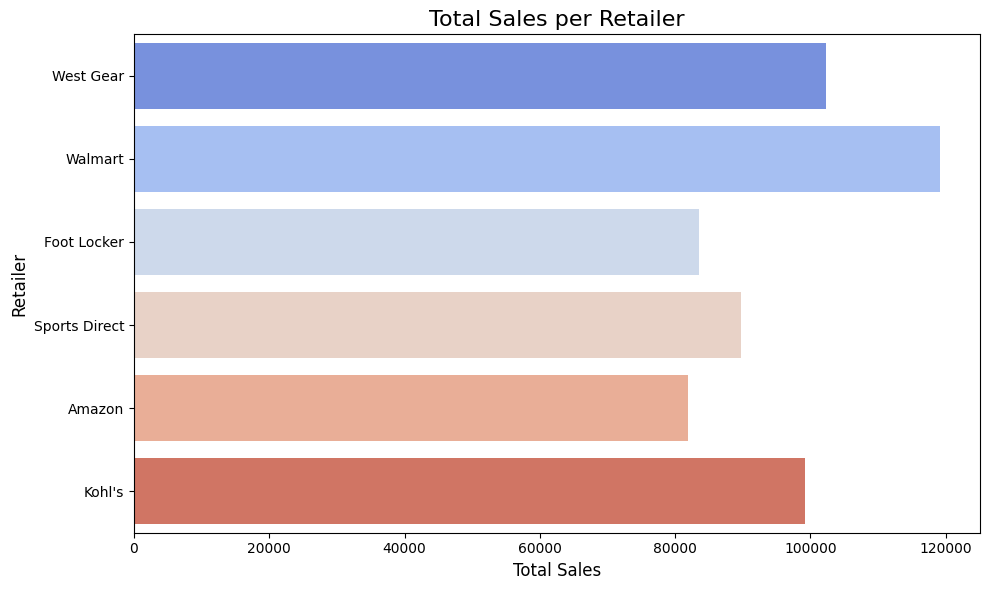

In [ ]:
# TotalSales per retailer Grapgh
TotalSales = sales.sort_values(by='TotalSales', ascending=False)

plt.figure(figsize=(10, 6))

sns.barplot(
    data=TotalSales,
    x='TotalSales',
    y='Retailer',
    palette='coolwarm',     # nice gradient
    errorbar=None
)
plt.title('Total Sales per Retailer', fontsize=16)
plt.xlabel('Total Sales', fontsize=12)
plt.ylabel('Retailer', fontsize=12)


plt.tight_layout()
plt.show()

C:\Users\aallen70\AppData\Local\Temp\ipykernel_13384\3882484618.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


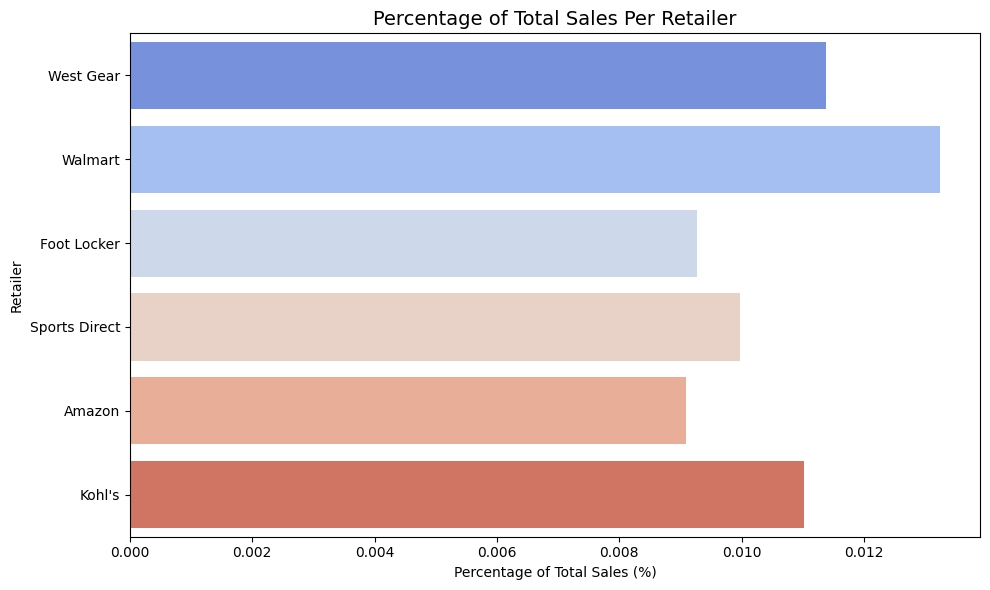

In [36]:
# %Graph Of total sales per Retailer

total_sales = sales['TotalSales'].sum()  # Total sales across all retailers
sales['PercentSales'] = (sales['TotalSales'] / total_sales) * 100  # Percentage sales per retailer

TotalSales = sales.sort_values(by='PercentSales', ascending=False)

plt.figure(figsize=(10, 6))

sns.barplot(
    data=TotalSales,
    x='PercentSales',
    y='Retailer',
    palette='coolwarm',  # Choose a color palette you like
    errorbar=None
)

plt.title('Percentage of Total Sales Per Retailer', fontsize=14)
plt.xlabel('Percentage of Total Sales (%)')
plt.ylabel('Retailer')

plt.tight_layout()
plt.show()

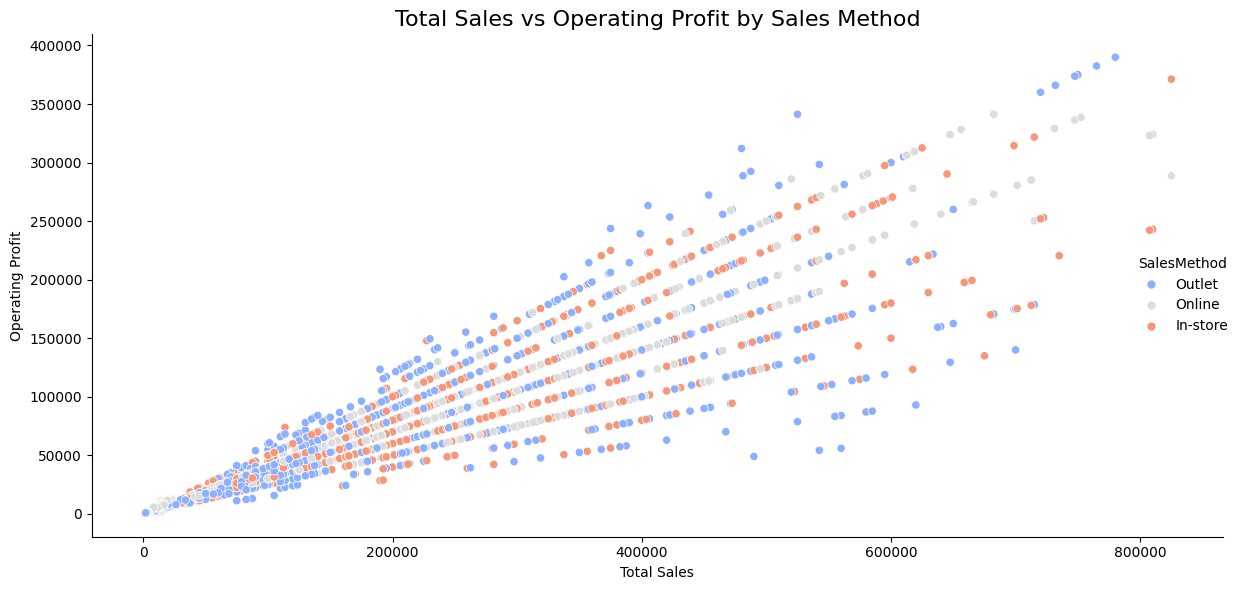

In [54]:
# Total sales vs Operating Profit
sns.relplot(
    data=sales,                   
    x='TotalSales',                 
    y='OperatingProfit',            
    hue='SalesMethod',             
    kind='scatter',                 
    height=6,                       
    aspect=1.9,                   
    palette='coolwarm',             
    markers=["o", "s"]             
)

plt.title('Total Sales vs Operating Profit by Sales Method', fontsize=16)
plt.xlabel('Total Sales')
plt.ylabel('Operating Profit')


plt.tight_layout()
plt.show()

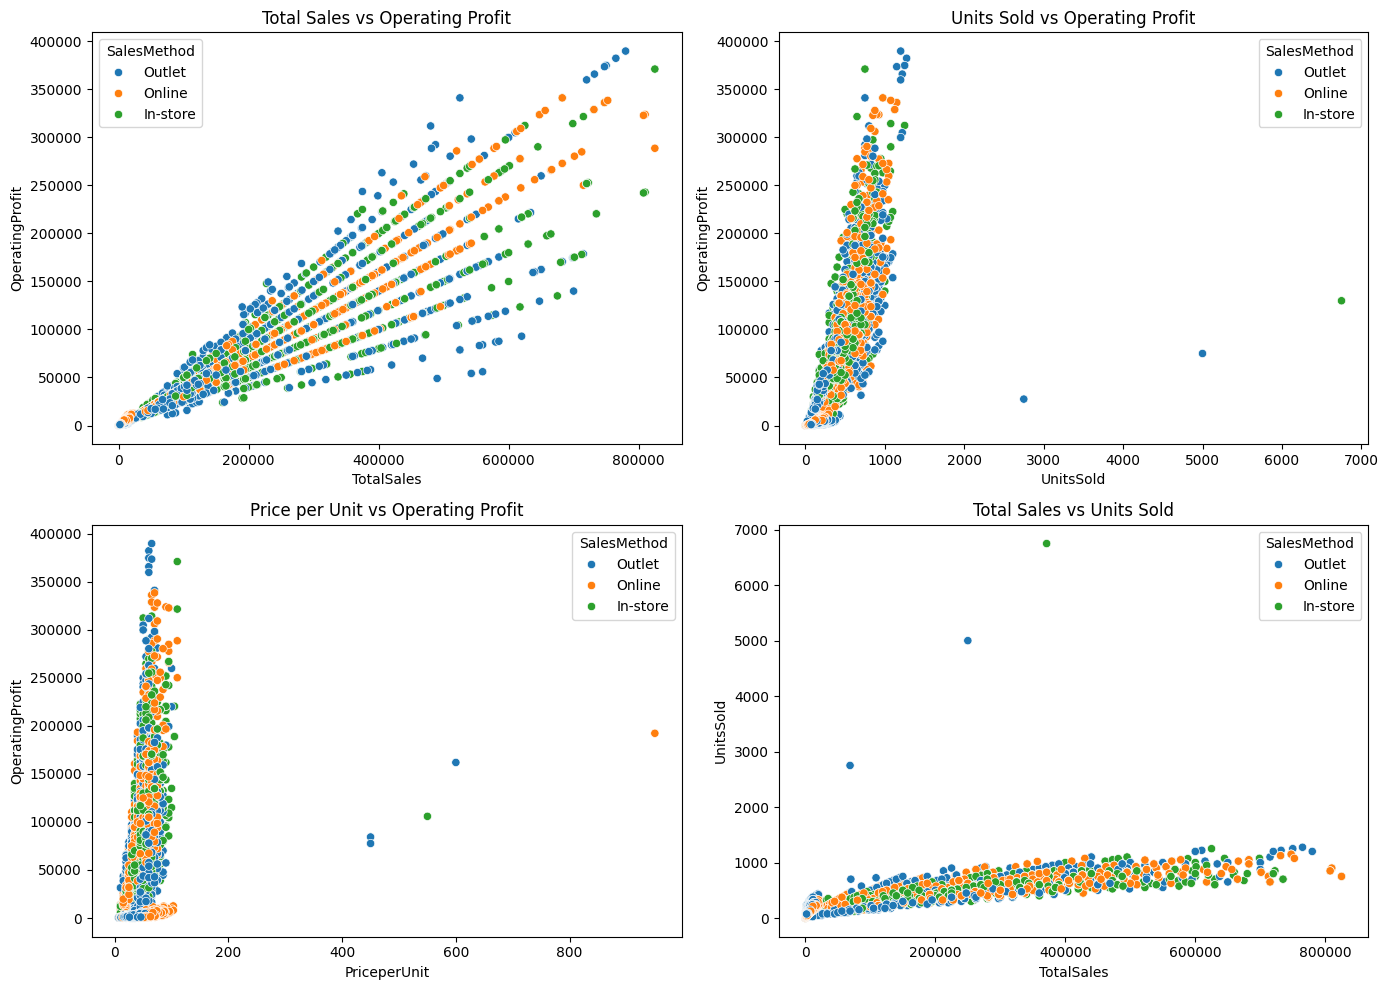

In [55]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# First subplot: Total Sales vs Operating Profit
sns.scatterplot(data=sales, x='TotalSales', y='OperatingProfit', hue='SalesMethod', ax=axes[0, 0])
axes[0, 0].set_title('Total Sales vs Operating Profit')

# Second subplot: Units Sold vs Operating Profit
sns.scatterplot(data=sales, x='UnitsSold', y='OperatingProfit', hue='SalesMethod', ax=axes[0, 1])
axes[0, 1].set_title('Units Sold vs Operating Profit')

# Third subplot: Price per Unit vs Operating Profit
sns.scatterplot(data=sales, x='PriceperUnit', y='OperatingProfit', hue='SalesMethod', ax=axes[1, 0])
axes[1, 0].set_title('Price per Unit vs Operating Profit')

# Fourth subplot: Total Sales vs Units Sold
sns.scatterplot(data=sales, x='TotalSales', y='UnitsSold', hue='SalesMethod', ax=axes[1, 1])
axes[1, 1].set_title('Total Sales vs Units Sold')

plt.tight_layout()
plt.show()

In [56]:
sales.loc[2168, "Region"] = "Midwest" # South Dakota
sales.loc[2705, "Region"] = "Northeast" # Connecticut
sales.loc[3621, "Region"] = "Midwest" # South Dakota
sales.loc[7281, "Region"] = "South" # West Virginia
sales.loc[9642, "Region"] = "Northeast" # Maine